# Load Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import Clean Dataset

In [3]:
# df = pd.read_csv('UpdatedResumeDataSet.csv')
# clean_df = pd.read_csv('clean_resume_data.csv')
resume = pd.read_csv('resume_data.csv')

In [9]:
resume.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
resume['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [12]:
# Step 2: Drop the 'Resume_html' Column
clean_resume = resume.drop(columns=['Resume_html'])


In [13]:
# Verify that the column has been dropped
print(clean_resume.head())

# Step 3: Save the Modified Dataset
clean_resume.to_csv('clean_resume_data.csv', index=False)

         ID                                         Resume_str Category
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...       HR
2  33176873           HR DIRECTOR       Summary      Over 2...       HR
3  27018550           HR SPECIALIST       Summary    Dedica...       HR
4  17812897           HR MANAGER         Skill Highlights  ...       HR


In [15]:
clean_resume.shape

(2484, 3)

# Exploratory Data analysis

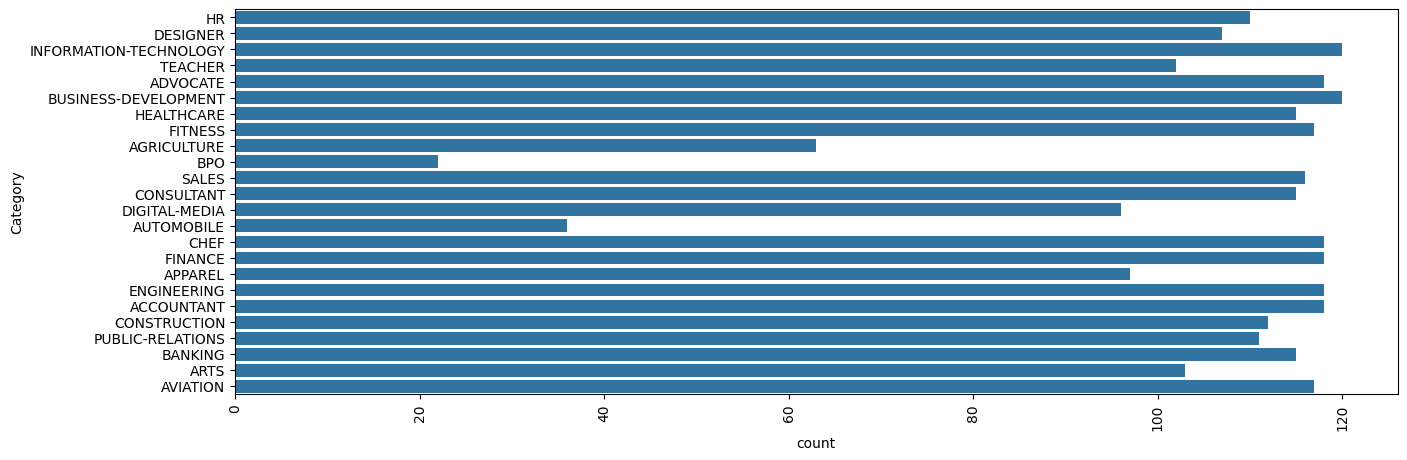

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(resume['Category'])
plt.xticks(rotation=90)
plt.show()

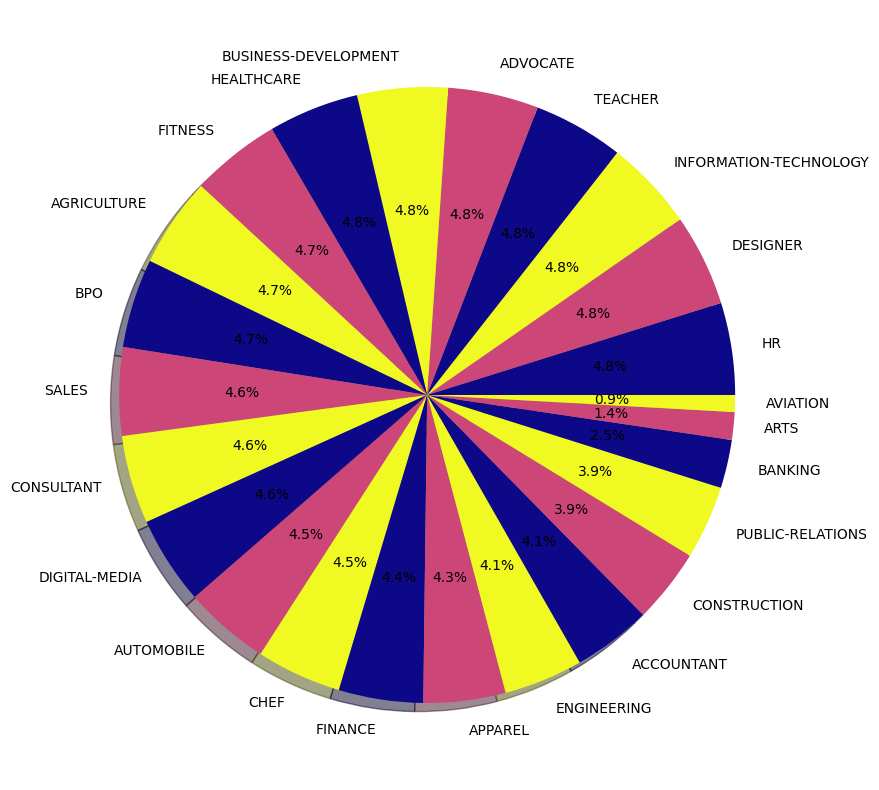

In [17]:
counts = clean_resume['Category'].value_counts()
labels = clean_resume['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Train-Test Split


In [37]:
from sklearn.model_selection import train_test_split

# Step 1: Define Features and Target Variable
X = clean_resume['Resume_str']  # Replace 'Resume_text' with the actual column name containing the resume text
y = clean_resume['Category']

# Step 2: Convert Text Data to Features Using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(X)

# Step 3: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (1987, 40524)
Testing data shape: (497, 40524)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define Features and Target Variable
X = clean_resume['Resume_str']  # Replace 'Resume_text' with the actual column name containing the resume text
y = clean_resume['Category']

# Check for missing values
if X.isnull().any() or y.isnull().any():
    print("Missing values detected. Please clean the data before proceeding.")
else:
    # Split the Dataset into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Encoding (TF-IDF)

In [39]:
    # Initialize the TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer on the training data and transform the data
    X_train_tfidf = vectorizer.fit_transform(X_train)

    # Transform the test data
    X_test_tfidf = vectorizer.transform(X_test)

    # Print the shape of the transformed data
    print(f"TF-IDF Training data shape: {X_train_tfidf.shape}")
    print(f"TF-IDF Testing data shape: {X_test_tfidf.shape}")

TF-IDF Training data shape: (1987, 35537)
TF-IDF Testing data shape: (497, 35537)


#  Train Random Forest Classifier

Accuracy: 0.6177062374245473
                        precision    recall  f1-score   support

            ACCOUNTANT       0.77      0.93      0.84        29
              ADVOCATE       0.79      0.63      0.70        30
           AGRICULTURE       0.67      0.25      0.36         8
               APPAREL       0.58      0.35      0.44        20
                  ARTS       0.25      0.06      0.09        18
            AUTOMOBILE       1.00      0.17      0.29         6
              AVIATION       0.62      0.76      0.68        21
               BANKING       0.65      0.65      0.65        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.68      0.48      0.57        27
                  CHEF       0.73      0.79      0.76        24
          CONSTRUCTION       0.90      0.79      0.84        34
            CONSULTANT       0.29      0.10      0.15        20
              DESIGNER       0.67      0.84      0.74        19
         D

c:\anaconda\envs\VISION\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\anaconda\envs\VISION\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\anaconda\envs\VISION\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


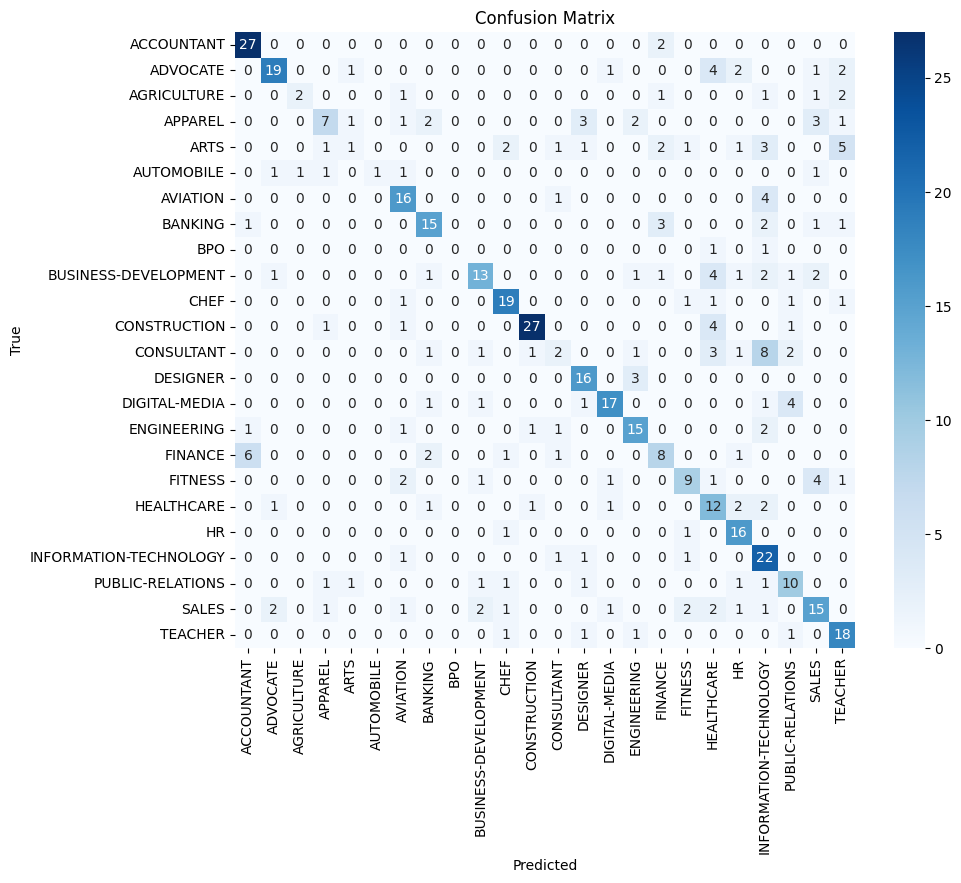

In [43]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Step 4: Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Predictive System

In [53]:
import pandas as pd

# Step 1: Prepare the Input Data
new_resume_summary = """hr assistant summary hard worker dedicated detailed oriented experienced organized highly motivated many attributes possess individual years experience human resource administration customer service talent quickly adapt new challenges experience focused benefits administration payroll career development employment law highlights assigned administrative assignments daily basis implemented employee handbook processed documentation employees conducted employees performance reviews managed employee scheduling coordinated upper level co worker lower level teamwork oriented processed new recruits processed payroll performed check managed inventory supplies secured new wholesale food purveyor decrease costs increase profits accomplishments accomplishments pho n restaurant managed restaurant financial objectives developing financing establishing banking relationships prepared strategic annual forecasts budgets analyzing variances initiating corrective actions establishing financial controls developed implemented strategies increase average meal checks created restaurant business plan surveying restaurant demand conferring people community identifying evaluating competitors preparing financial marketing sales projections analyses estimates controlled purchases inventory meeting account manager negotiating prices contracts developing preferred supplier lists reviewing evaluating usage reports analyzing variances taking corrective actions contributed team effort inspired team members motivation provided high level customer service maintain high profile day day operations handled complaints contentious issues settled directly team members provides fast solution accomplished campaign recycle program divide right trash right bin accomplishments dr norman g mckoy associates demonstrated success administrative employee handbook developing team building programs corporate policies job descriptions management reports organized office documents patients charts organized office woking areas welcomed new employees organization conducting orientation organized employees document pockets maintained employees confidence protect operation keeping human resource information confidential maintained employee information entering updating employment status change data provided payroll information collecting time attendance records provided secretarial support entering formatting printing information organizing work answering telephone relaying messages maintaining equipment supplies experience company name city state hr assistant increased productivity physician office organizing patients charts converting digital files streamline patient maintenance processed pay roll paychex includes ensured vacation sick time tracked system answered payroll questions facilited resolutions payroll errors processed incoming mails going mails successfully edited employee handbook define job descriptions create office policies patient managing proper patient reports wrote employee handbook covering issues including disciplinary procedures code conduct fmla policy benefits information wrote standard operations procedures manual sops detailed aspect employee expectations designed implement overall recruiting strategy coordinated office manager recruit right candidates administering interviews conducting background checks processed documentation prepared reports relating personnel activities staffing recruitment training performance evaluations etc identified reduced business expenses increase profits controlling budget compares actual results budget expectations company name city state general manager current hostess waitress promoted interview recruit new hires order sustain longer hours operation thus increased company profitswas successful ensuring successful integration new hires implementing training compensation structures ordered foods supplies restaurant checked maintained inventory handling daily accounting processing payroll processed cost reduction thought venders whole sale increased marketability restaurant designing creating new modernized menu prepared willing step restaurant short staff low turn order increase productivity provide best service maintained great quality quantity foods restaurant created recycle program divided recyclable bin non recyclable waste bin education bachelor arts humanities english university thai chamber commerce city thailand humanities english excelled language culture transportation management critical reading article writing advanced technical reading master science human resource management strayer university city state usa human resource management magna cum laude excelled human resources law management ethical hr information systems hris strategic management registered professional human resources aphr certification hr designations registering aphr professional human resources exam expect complete aphr certification professional affiliations enrolling ongoing training areas compensation benefits employee labor relations leaves absence workers compensation workplace safety security member society human resource management shrm skills human resource management skills employment law hr policies procedures training development performance management employee relations mediation benefits administration orientation boarding organizational development staff life cycle computer skills hris applications peoplesoft enterprise human resources ms office word excel powerpoint access outlook e mailing tools ms outlook windows outlook yahoo google networking skills job boards networking sites soft skills professional communication skills interpersonal skills bilingual thai english excellent adaptability new environments hard working flexible reliable honest polite shape decision making excellent customer service skills creative"""

# Convert to DataFrame
new_resume_df = pd.DataFrame([new_resume_summary], columns=['Resume_str'])

# Step 2: Preprocess the Input Data
# Transform the new resume summary into TF-IDF features
new_resume_tfidf = vectorizer.transform(new_resume_df['Resume_str'])

# Step 3: Make Predictions
predicted_category = rf_classifier.predict(new_resume_tfidf)

print("Predicted Category:", predicted_category[0])


Predicted Category: HR


In [58]:
import pandas as pd

# Step 1: Prepare the Input Data
new_resume_summary = new_resume_summary = """information technology manager network engineer professional overview highly skilled accomplished information technology manager years expertise planning implementing streamlining systems ensure maximum customer satisfaction business revenue strong leader demonstrated ability work effectively individuals levels functional areas exceptional communication project management skills ability successfully manage multiple priorities assignments skills platforms windows server professional windows xp pro home win dos citrix ica ms exchange hardware hp ibm dell intel based server desktop platforms cisco switches sonic wall hardware vpns hp laser jets toshiba e color copier toshiba sony laptops inter tel software ms office visio citrix metaframe xp symantec pc anywhere ghost antivirus utilities win fax mcafee virus scan adobe acrobat illustrator photoshop partition magic adware spyware networking tcp ip wireless b g dns wins dhcp relevant experience information technology manager network engineer feb current company name city state responsible day day operations functions wilkes six offices staff members currently lead team professionals developers planning upgrades implementation systems business applications development new software tools work closely cio senior management ensure business technology objectives aligned researched new technologies calculated future needs achieve accurate capacity planning negotiated hardware software purchases maintenance contracts dramatically reduced costs maintenance virtualizing company infrastructure using vmware reduced physical servers streamlined disaster recovery processes planned executed active directory domain migration r coordinated planning migration mpls network sites including upgrades routers switches network equipment increased speed reliability company email migrating microsoft exchange streamlined operations designing new citrix infrastructure using netscaler load balancers ensure better speed connectivity less downtime remote offices led planning implementation disaster recovery site atlanta created company first comprehensive business continuity plan tested success installed configuring barracuda spam virus firewalls resulting reduction spam enforced security policies managed monitored updated spam filtering virus malware prevention systems reduced desktop application deployment times designing implementing microsoft system center configuration manager conducted training internal systems local procedures technical subjects company employees coordinate external technology vendors internal staff members third party consultants network engineer sep jan company name city state administered managed windows server network environment responsible lan wan duties local remote networks acted technical consultant clients various projects provide end user support windows xp operating systems installed implemented exchange mail server implemented server desktop security using mcafee enterprise epolicy orchestrator installed configured web servers ftp servers pop mail servers manage cisco switches routers configured vpn remote access users implemented software domain policies patches upgrades using group policy sus trained new employees systems administration web development network support technician jan aug company name city provided network desktop support users provided technical support offices b domain supported help desk using help star software troubleshooting windows desktop computers implemented group policy objects control desktop environment security performed hardware software upgrades replacements performed installations troubleshooting ms office suite managed users computers organizational units active directory created disc images desktop notebook computers using norton ghost troubleshooting repairs laser printers copy machines education bachelor science management information systems university maryland university college city state certifications microsoft certified technology specialist mcts citrix certified administrator cca information systems management certificate project management certificate"""
new_resume_df = pd.DataFrame([new_resume_summary], columns=['Resume_str'])

# Step 2: Preprocess the Input Data
# Transform the new resume summary into TF-IDF features
new_resume_tfidf = vectorizer.transform(new_resume_df['Resume_str'])

# Step 3: Make Predictions
predicted_category = rf_classifier.predict(new_resume_tfidf)

print("Predicted Category:", predicted_category[0])


Predicted Category: INFORMATION-TECHNOLOGY


# Save Files

In [57]:
import pickle

# Save the RandomForestClassifier model
with open('random_forest_classifier.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

# Save the TfidfVectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Models saved successfully.")


Models saved successfully.


### Save with Joblib

In [54]:
import joblib

# Save the RandomForestClassifier model
joblib.dump(rf_classifier, 'random_forest_model.joblib')

# Save the TfidfVectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

print("Model and Vectorizer saved successfully!")


Model and Vectorizer saved successfully!


### To Load the Saved Models Later:

In [ ]:
import pickle

# Load the RandomForestClassifier model
with open('random_forest_classifier.pkl', 'rb') as model_file:
    rf_classifier = pickle.load(model_file)

# Load the TfidfVectorizer
with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

print("Models loaded successfully.")
